# **Sales Analysis in Ice Video Game Store**

#Project Goals

As an analyst at the online store "Ice" which sells video games from around the world. Data regarding user and expert reviews of games, genres, platforms (e.g. Xbox or PlayStation), and historical game sales data is available from open sources. We need to identify the patterns that determine whether a game is successful or not. In that way, we can find the games with the most potential and plan their ad campaigns.

In front of us is dataset from 2016. Let's imagine that it is December 2016 and we are planning a campaign for 2017.

(Right now, the most important thing for us is to gain experience working with data. It doesn't matter whether we forecast 2017 sales based on data from 2016 or forecast 2027 sales based on data from 2026.).

This dataset contains abbreviations. ESRB stands for Entertainment Software Rating Board, which is an independent regulatory organization that evaluates game content and gives an age rating such as Teen or Mature.

# Stage 1. Open the data file and learn the general information

# Import Libraries and Load Dataset

In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind

In [ ]:
url = '/datasets/games.csv'
data = pd.read_csv(url)

In [ ]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# Stage 2. Prepare the data

- Rename the columns (adjust all columns name to lowercase).
- Convert data to a correct datatype.
- Describe which columns datatypes that has converted and explain why.
- If needed, specify how we will handle the missing values:
   - Explain the reasons why we filled in the missing values the way we did or the reasons why we left them blank.
   - Why do we think the values disappeared? Give possible reasons.
   - Pay attention to the abbreviation TBD (to be determined or in Indonesian, "will be determined"). Decide how we will handle such cases.
- Calculate the total sales (total sales in all regions) for each game and enter these values into a separate column.


# Data Quality Checking

**Check datatype**

In [ ]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
data.shape

(16715, 11)

In [ ]:
data.User_Score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Calculate the total sales (sum of sales across all regions) for each game and put these values into separate columns.

In [ ]:
data['total_sales'] = data.NA_sales + data.EU_sales + data.JP_sales + data.Other_sales

In [ ]:
data.loc[data.User_Score == 'tbd', 'total_sales'].mean()

0.18816006600660068

In [ ]:
data.loc[data.User_Score != 'tbd', 'total_sales'].mean()

0.5919536771394583

**Conclusion:**

Based on the average data above. Games with a `User_Score` `tbd` are games with lower average sales than those with a rating

# Data Cleansing

In [ ]:
data.loc[data.User_Score == 'tbd'].head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,total_sales
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E,6.70
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+,3.97
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T,2.81
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E,2.42
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E,2.40


Describe which of the columns we have changed the datatype of and explain why.
- `Year_of_Release` = because there are a lot of NaN values, around 300 data, it is replaced with the median value, so that the data type can be changed to int
- `Critic_Score` = the NaN value has not been changed, it is possible that no user has provided criticism related to the game, besides that because the criticism score is personal from each user who makes criticism. So, it's irrelevant if we fill it with a certain value.
- `User_Score` = tbd becomes NaN, so that it is detected as a missing value during visualization
- `Rating` = NaN changed to RP (Rating Pending), this type of rating has not been determined with an exact rating

source:https://www.esrb.org/ratings-guide/


In [ ]:
# Change the tbd value to a missing value
data.loc[data.User_Score == 'tbd', 'User_Score'] = np.NaN

Convert data to a correct datatype.
- `User_Score` becomes a float, because it is a decimal number that has a value after the comma
- `Year_of_Release` becomes an int, because it is an integer

In [ ]:
# Change the user score data type to float
data.User_Score = data.User_Score.astype(float)

In [ ]:
# Check the games released from the platform
data.groupby('Platform').min()['Year_of_Release']

Platform
2600    1980.0
3DO     1994.0
3DS     2011.0
DC      1998.0
DS      1985.0
GB      1988.0
GBA     2000.0
GC      2001.0
GEN     1990.0
GG      1992.0
N64     1996.0
NES     1983.0
NG      1993.0
PC      1985.0
PCFX    1996.0
PS      1994.0
PS2     2000.0
PS3     2006.0
PS4     2013.0
PSP     2004.0
PSV     2011.0
SAT     1994.0
SCD     1993.0
SNES    1990.0
TG16    1995.0
WS      1999.0
Wii     2006.0
WiiU    2012.0
X360    2005.0
XB      2000.0
XOne    2013.0
Name: Year_of_Release, dtype: float64

In [ ]:
data.loc[(data.Platform=='DS'), 'Year_of_Release'].unique()

array([2006., 2005., 2010., 2009., 2004., 2007., 2012., 2008., 2011.,
         nan, 2013., 1985.])

In [ ]:
data.loc[(data.Platform=='DS') & (data.Year_of_Release==1985)]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


In [ ]:
# Because the DS Platform released in 2004 but there was a game that came out in 1985
# this game should be changed to 2010
data.loc[(data.Platform=='DS') & (data.Year_of_Release==1985), 'Year_of_Release'] = 2010

In [ ]:
# Get the name of the game that contains `year` in the name
data.loc[(data.Year_of_Release.isna()) & (data.Name.str.contains('\d{4}', regex=True))].head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,total_sales
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
1650,NASCAR Thunder 2003,PS2,NaN,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E,1.22
2572,PES 2009: Pro Evolution Soccer,PSP,NaN,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN,0.80
3486,Madden NFL 2002,XB,NaN,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E,0.58
4775,NFL GameDay 2003,PS2,NaN,Sports,0.20,0.15,0.00,0.05,60.0,NaN,E,0.40
5156,NBA Live 2003,XB,NaN,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E,0.36
5336,Tomb Raider (2013),PC,NaN,Action,0.06,0.25,0.00,0.04,86.0,8.5,M,0.35
5655,All-Star Baseball 2005,PS2,NaN,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E,0.32


In [ ]:
years_data = data.loc[(data.Year_of_Release.isna()) & (data.Name.str.contains('\d{4}', regex=True))]
years_data = years_data.Name.str.extract(pat='(\d{4})')
years_data

,0
183,2004
377,2004
475,2006
1650,2003
2572,2009
3486,2002
4775,2003
5156,2003
5336,2013
5655,2005


In [ ]:
data.loc[(data.Year_of_Release.isna()) & (data.Name.str.contains('\d{4}', regex=True)), 'Year_of_Release'] = years_data

In [ ]:
data.loc[data.Year_of_Release.isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,total_sales
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+,0.01
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0.01
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,0.01
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


There is some missing values in `Year_of_Release` column

In [ ]:
data["Year_of_Release"].describe()

count    16446.000000
mean      2006.486136
std          5.874725
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: Year_of_Release, dtype: float64

In [ ]:
# Fill in the missing values in `Year_of_Release` column, using median values
data.loc[(data.Year_of_Release.isna()),'Year_of_Release'] = 2007

In [ ]:
# Change the `Year_of_Release` column datatype to int
data.Year_of_Release = data.Year_of_Release.astype(int)

In [ ]:
# Change the NaN value to RP
data.loc[data.Rating.isna(), 'Rating'] = 'RP'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16715 non-null  int64  
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       7590 non-null   float64
 10  Rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,RP,0.01


Rename the columns (adjust all columns name to lowercase).

In [ ]:
data.columns = map(str.lower, data.columns)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


# Stage 3. Analyze the data

- Review how many games were released in different years. Is the data in each period significant?
- See how sales vary from platform to platform. Choose the platform with the largest total sales and make the distribution based on data per year. Find a platform that used to be popular but now doesn't have any sales. How long does it generally take for new platforms to emerge and old platforms to fade in popularity?
- Determine the time period for data collection. To do this, look at our answers to the previous questions. The data we capture should allow us to build a benchmark for 2017.
- Only work with data that we've decide is relevant. Ignore data for previous years.
- Which platforms have the most sales? Which platforms are growing or shrinking? Choose several platforms that have the potential to generate profits.
- Create a boxplot for global sales of all games grouped by platform. Is the difference in sales significant? What about the average sales on various platforms? Describe your discovery.
- See how user and professional reviews affect sales on any of the popular platforms (which you choose). Make a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
- Keeping our previous conclusions in mind, compare sales of the same game on other platforms.
- Observe the general distribution of games by genre. What can we conclude about the most profitable genres? Can we generalize about genres with high and low sales?

Review how many games were released in different years. Is the data in each period significant?

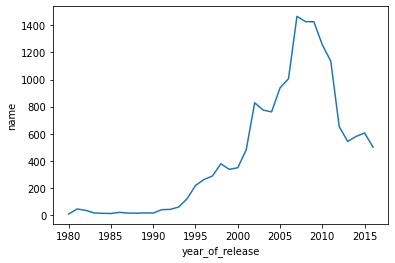

In [ ]:
yearly_game = pd.pivot_table(data, index='year_of_release', values='name', aggfunc='count').reset_index()
sns.lineplot(data=yearly_game, x='year_of_release', y='name')
plt.show()

In [ ]:
yearly_game

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,13
6,1986,21
7,1987,16
8,1988,15
9,1989,17


**Conclusion**

Based on the graph above, there is an increase in game releases starting in 1994 with 121 game titles, then at its peak in 2007 there were 1466 game titles. This trend has decreased significantly after 2011, possibly due to the emergence of a new game platform that requires the development team to adapt to more sophisticated game engines.

See how sales vary from platform to platform. Choose the platform with the largest total sales and make the distribution based on data per year. Find a platform that used to be popular but now doesn't have any sales. How long does it generally take for new platforms to emerge and old platforms to fade in popularity?

In [ ]:
sales_plt = data.groupby('platform').sum().sort_values(by='total_sales', ascending=False)['total_sales'].reset_index()
sales_plt

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


In [ ]:
# Platforms to be taken are those with sales above the 30th percentile.
p30 = np.quantile(sales_plt.total_sales, 0.30)
plts = sales_plt.loc[sales_plt.total_sales > p30, 'platform']
plts

0      PS2
1     X360
2      PS3
3      Wii
4       DS
5       PS
6      GBA
7      PS4
8      PSP
9       PC
10     3DS
11      XB
12      GB
13     NES
14     N64
15    SNES
16      GC
17    XOne
18    2600
19    WiiU
20     PSV
Name: platform, dtype: object

In [ ]:
# Popular platforms
temp = data.loc[(data.platform).isin(plts)]

In [ ]:
# Platform list that already extinct
pivot_sales = pd.pivot_table(temp, columns='year_of_release', index='platform', values='total_sales', aggfunc='sum').reset_index()
pivot_sales

year_of_release,platform,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,...,10.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.19,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
2,DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,150.28,145.31,119.54,85.04,26.18,11.01,1.54,NaN,NaN,NaN
3,GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,...,1.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,GC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,N64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NES,NaN,NaN,NaN,10.96,50.08,53.44,36.41,19.76,45.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,PC,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,0.03,...,13.04,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25
9,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Platform list that already extinct
platform_punah = list(pivot_sales.loc[pivot_sales[2016].isna(), 'platform'])
platform_punah

['2600',
 'DS',
 'GB',
 'GBA',
 'GC',
 'N64',
 'NES',
 'PS',
 'PS2',
 'PSP',
 'SNES',
 'XB']

In [ ]:
# data analysis for the platform that already extinct
temp = data.loc[(data.platform).isin(platform_punah)]
temp.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,RP,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,RP,28.31


In [ ]:
pivot_sales = pd.pivot_table(temp, columns='platform', index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
pivot_sales

platform,year_of_release,2600,DS,GB,GBA,GC,N64,NES,PS,PS2,PSP,SNES,XB
0,1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1983,5.84,NaN,NaN,NaN,NaN,NaN,10.96,NaN,NaN,NaN,NaN,NaN
4,1984,0.27,NaN,NaN,NaN,NaN,NaN,50.08,NaN,NaN,NaN,NaN,NaN
5,1985,0.45,NaN,NaN,NaN,NaN,NaN,53.44,NaN,NaN,NaN,NaN,NaN
6,1986,0.67,NaN,NaN,NaN,NaN,NaN,36.41,NaN,NaN,NaN,NaN,NaN
7,1987,1.94,NaN,NaN,NaN,NaN,NaN,19.76,NaN,NaN,NaN,NaN,NaN
8,1988,0.74,NaN,1.43,NaN,NaN,NaN,45.01,NaN,NaN,NaN,NaN,NaN
9,1989,0.63,NaN,64.97,NaN,NaN,NaN,7.85,NaN,NaN,NaN,NaN,NaN


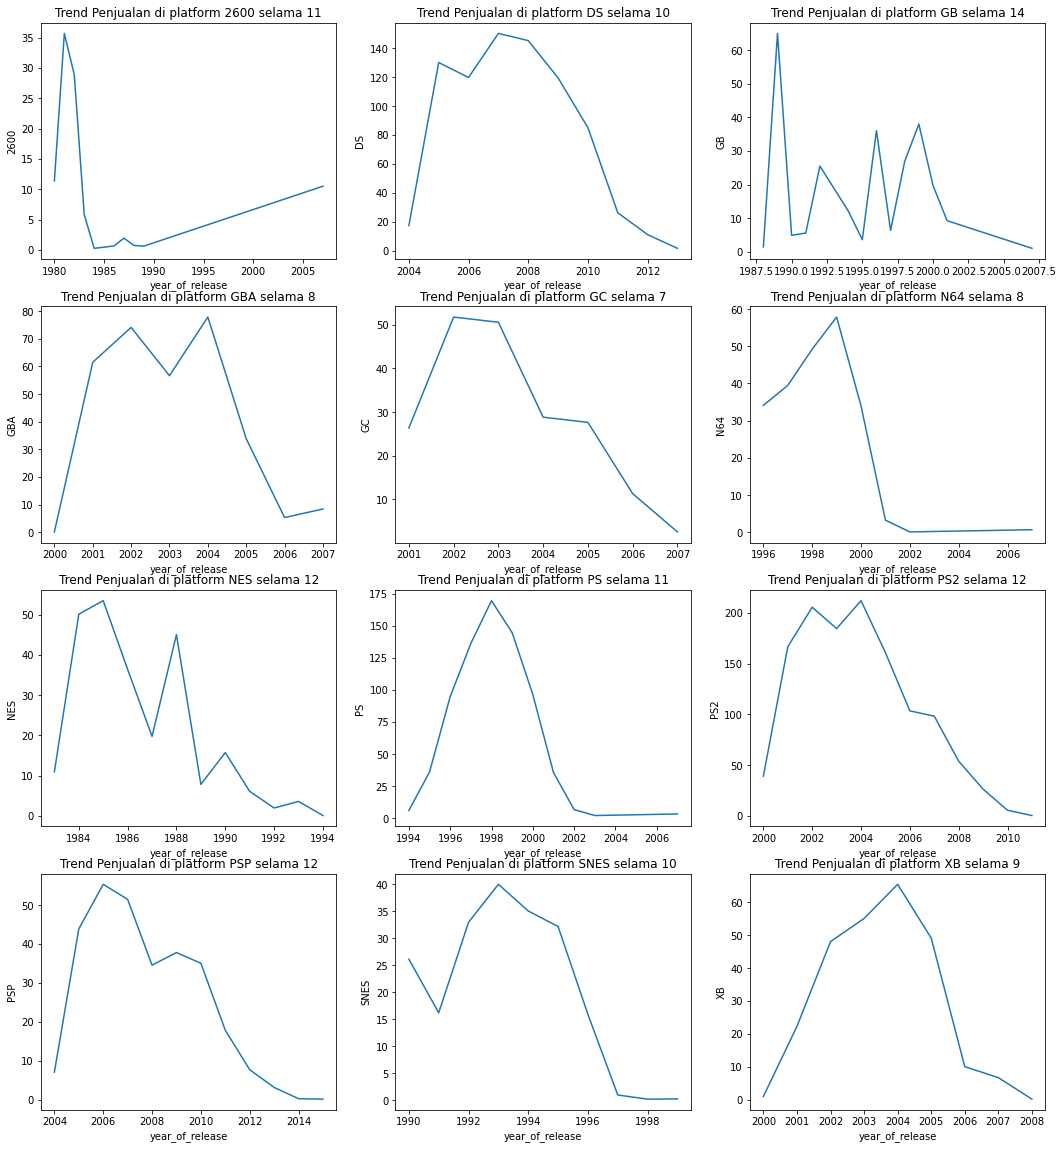

In [ ]:
plt.figure(figsize=(18, 20))
i = 1
for platform in platform_punah:
    jml_thn = pivot_sales[platform].count()
    plt.subplot(4, 3, i)
    plt.title(f'Sales Trend in the platform {platform} during {jml_thn}')
    sns.lineplot(data=pivot_sales, x="year_of_release", y=platform)
    i = i + 1
plt.show()

In [ ]:
# Average Age of Platform
pivot_sales.drop('year_of_release', axis=1).count().mean()

10.333333333333334

**Conclusion**

Findings:
- Based on the data above, it is found that the average age of popular platforms is around 10 years.

Insights:
- If we want to create a game on a certain platform, look at the age of the platform or we can also see which platforms will be released in the coming year. Is the platform approaching the age of extinction or not.

Recommendation:
- If we want to create a new game, it is recommended that the platform age is still under 5 years.

Which platforms have the most sales? Which platforms are growing or shrinking? Choose several platforms that have the potential to generate profits.

In [ ]:
data.groupby('platform').sum().sort_values(by='total_sales', ascending=False)['total_sales']

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

**Conclusion**

The platform with the most sales is PS2 with total sales of 1255.77

Some platforms that have the best game release growth trends:
- PS2
- X360
- PS3

Some of the platforms that have the worst game release growth trends:
- 3DO
- GG
- PCFX

Potential games that will generate profits are PS3, PS4 and PC. Because the PS4 platform is relatively new and will certainly replace the previous platform (PS3), PS3 games will continue to increase over the next few years. The PC platform is no less profitable, because technology such as VGA for playing games with heavy specifications will also continue to experience rapid development.

Construct a boxplot for the global sales of all games grouped by platform. Is the difference in sales significant? What about the average sales on various platforms? Describe your discovery.

In [ ]:
transaction = pd.pivot_table(data=data, index='platform', values='total_sales', aggfunc='mean').reset_index()
release_year = pd.pivot_table(data=data, index='platform', values='year_of_release', aggfunc='min').reset_index()
transaction.merge(release_year, how='inner', on='platform').sort_values('total_sales', ascending=False)

,platform,total_sales,year_of_release
5,GB,2.606735,1988
11,NES,2.561735,1983
8,GEN,1.061034,1990
23,SNES,0.836987,1990
18,PS4,0.801378,2013
28,X360,0.769746,2005
0,2600,0.729173,1980
17,PS3,0.705973,2006
26,Wii,0.687508,2006
10,N64,0.685517,1996


In [ ]:
boxplot_data = data[['name', 'platform', 'total_sales']]
boxplot_data['total_sales'] = boxplot_data['total_sales'] * 1000000
boxplot_data.head()

/tmp/ipykernel_26/1860569850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boxplot_data['total_sales'] = boxplot_data['total_sales'] * 1000000


,name,platform,total_sales
0,Wii Sports,Wii,82540000.0
1,Super Mario Bros.,NES,40240000.0
2,Mario Kart Wii,Wii,35520000.0
3,Wii Sports Resort,Wii,32770000.0
4,Pokemon Red/Pokemon Blue,GB,31380000.0


In [ ]:
#average sales on multiple platforms
transaction = pd.pivot_table(data=data, index='platform', values='total_sales', aggfunc='mean').reset_index()
release_year = pd.pivot_table(data=data, index='platform', values='year_of_release', aggfunc='min').reset_index()
transaction.merge(release_year, how='inner', on='platform').sort_values('total_sales', ascending=False)

,platform,total_sales,year_of_release
5,GB,2.606735,1988
11,NES,2.561735,1983
8,GEN,1.061034,1990
23,SNES,0.836987,1990
18,PS4,0.801378,2013
28,X360,0.769746,2005
0,2600,0.729173,1980
17,PS3,0.705973,2006
26,Wii,0.687508,2006
10,N64,0.685517,1996


**Conclusion**

Findings:
Here are the top 5 biggest average game sales in their golden years
- GB in 1988 with an average total sales value of 2.606735
- NES in 1983 with an average total sales value of 2.561735
- GEN in 1990 with an average total sales value of 1.061034
- SNES in 1990 with an average total sales value of 0.836987
- PS4 in 2013 with an average total sales value of 0.801378

Insights:
Total sales in 1988 has a highest record in average game sales. Then, games which released in 2010 and later, have the lowest average game sales.

Recommendation:
It can be concluded that the 1980s was a golden period in the game sales.

In [ ]:
p90 = np.percentile(boxplot_data['total_sales'], 90)
boxplot_data = boxplot_data.loc[boxplot_data['total_sales'] < p90]

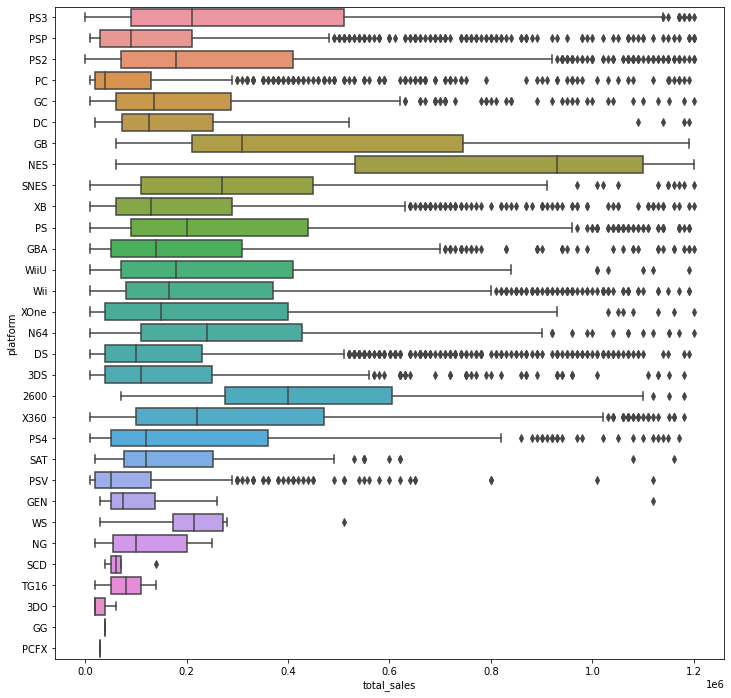

In [ ]:
plt.figure(figsize=(12, 12))
sns.boxplot(data=boxplot_data, x='total_sales', y='platform')
plt.show()

**Conclusion**

Here are the top 3 total sales based on the data above
- Approximately 50% of game sales on the NES platform are in the range `total_sales` 0.5 - 1.1
- Approximately 50% of game sales on the GB platform are in the range `total_sales` 0.2 - 0.8
- Approximately 50% of game sales on the PS3 platform are in the range `total_sales` 0.1 - 0.5

See how user and professional reviews affect sales on any of the popular platforms (which you choose). Make a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

In [ ]:
korelasi = data [['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'total_sales']]
korelasi.tail()

,name,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
16710,Samurai Warriors: Sanada Maru,0.00,0.00,0.01,0.0,NaN,NaN,0.01
16711,LMA Manager 2007,0.00,0.01,0.00,0.0,NaN,NaN,0.01
16712,Haitaka no Psychedelica,0.00,0.00,0.01,0.0,NaN,NaN,0.01
16713,Spirits & Spells,0.01,0.00,0.00,0.0,NaN,NaN,0.01
16714,Winning Post 8 2016,0.00,0.00,0.01,0.0,NaN,NaN,0.01


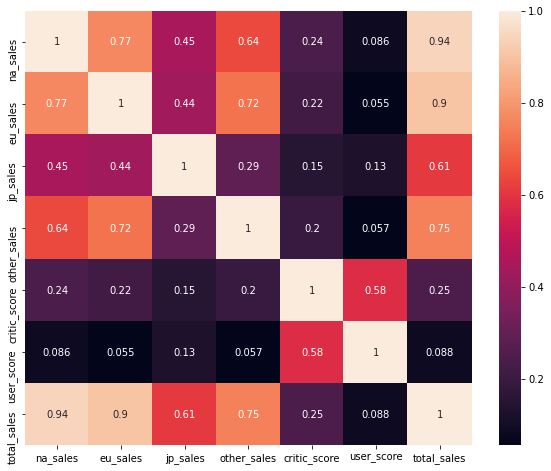

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(korelasi.corr(), annot=True)
plt.show()

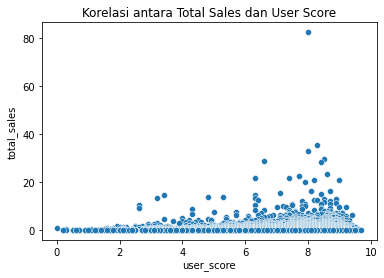

In [ ]:
plt.title('Correlation between Total Sales and User Score')
sns.scatterplot(data=korelasi, x='user_score', y='total_sales')
plt.show()

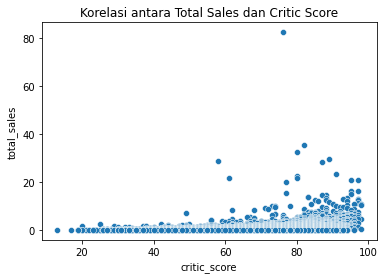

In [ ]:
plt.title('Correlation between Total Sales and Critic Score')
sns.scatterplot(data=korelasi, x='critic_score', y='total_sales')
plt.show()

Findings:
- Total sales and critic score have a weak positive correlation (25%)
- While the total sales and user scores correlate very weakly and are close to 0 (8.8%)
  
Insights:
  - The higher the user score, the higher the sales, and vice versa
  
Recommendation:
- If there is a game that has a positive or negative critic score by the user, then this will not affect sales. so you don't need to worry about it.

Keeping your previous conclusions in mind, compare sales of the same game on other platforms.

Observe the general distribution of games by genre. What can we conclude about the most profitable genres? Can you generalize about genres with high and low sales?

In [ ]:
data.groupby('platform').sum().sort_values(by='total_sales', ascending=False)['total_sales']

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [ ]:
cols = ['name', 'platform', 'critic_score', 'user_score', 'total_sales']
korelasi = data.loc[data.platform=='PS2', cols]
korelasi.tail()

,name,platform,critic_score,user_score,total_sales
16670,Sugar + Spice! Anoko no Suteki na Nanimokamo,PS2,NaN,NaN,0.01
16671,Kanokon: Esuii,PS2,NaN,NaN,0.01
16683,Scarlett: Nichijou no Kyoukaisen,PS2,NaN,NaN,0.01
16689,Real Rode,PS2,NaN,NaN,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,NaN,NaN,0.00


In [ ]:
platforms = data.platform.unique()
n_platform = data.platform.nunique()
cols = ['name', 'platform', 'critic_score', 'user_score', 'total_sales']
platforms

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
def corr_platform (data, cols, n_platform, platforms, length, height):
    plt.figure(figsize=(3*length, 11*height))
    for i in range(n_platform):
        platform1 = platforms[i]

        korelasi = data.loc[data.platform==platform1, cols]

        plt.subplot(11, 3, i+1)
        plt.title(f'Correlations in the platform {platform1}')
        sns.heatmap(korelasi.corr(), annot=True)

    plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/matrix.py:194: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/conda/lib/python3.9/site-packages/seaborn/matrix.py:199: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


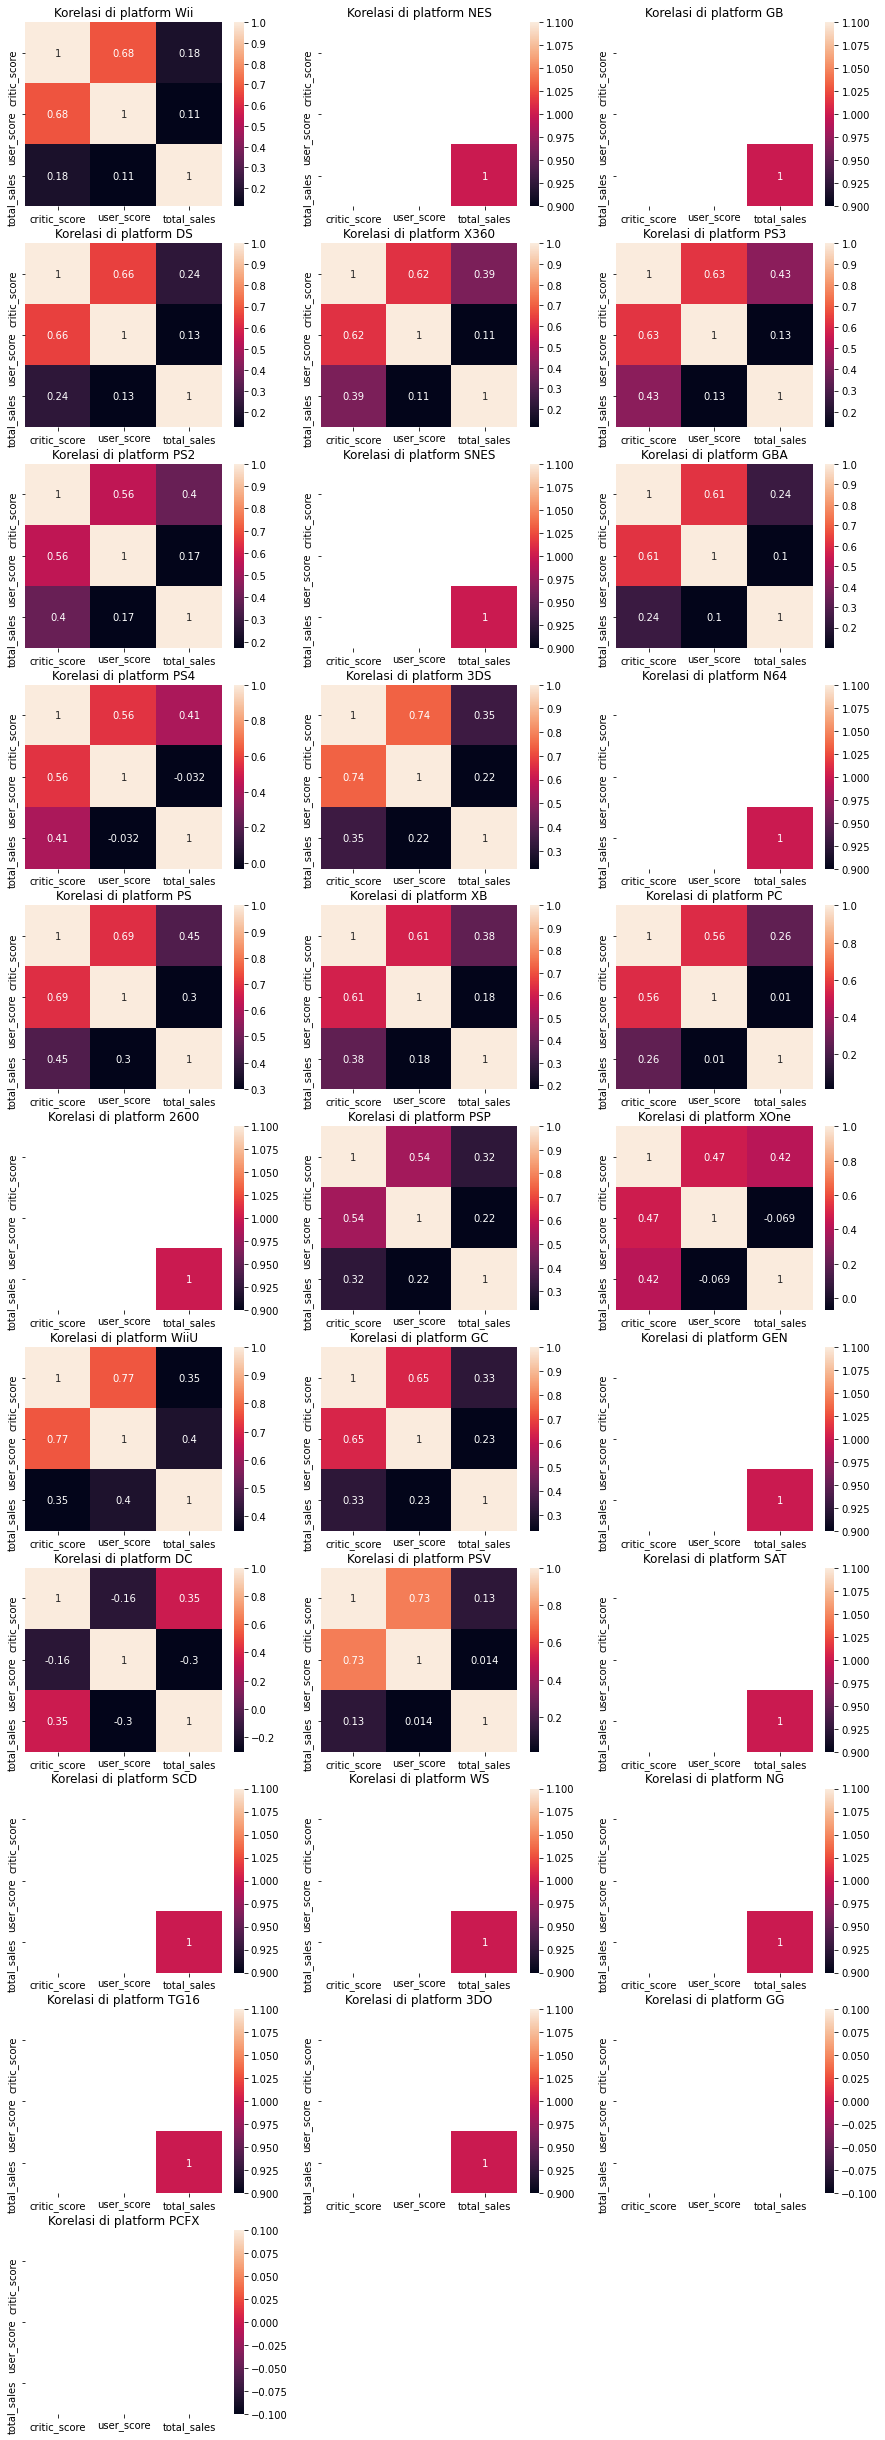

In [ ]:
corr_platform (data=data, cols=cols, n_platform=n_platform, platforms=platforms, length=5, height=4)

**Conclusion**

Wii platforms
- There is a fairly strong correlation between the user score and the critical score of 0.68.
- The higher the user score, the higher the critic score, and vice versa
- If there is a game that has a positive or negative user score by the user, then this will not affect sales. so you don't need to worry about this

X360 platforms
- There is a rather strong correlation between the critical score and sales of 0.39.
- The higher the critic score, it represents the high critic score, and vice versa
- If there is a game that has a positive or negative critic score by the user, then this will affect sales. so this needs to be considered.

If you look at it as a whole. Games on newly released platforms have a strong relationship with the critic score

# Stage 4. Perform user profiling for each region

For each region (NA, EU, JP), determine:
- Top 5 platforms. Explain the variations in market share from one region to another.
- Top 5 genres. Explain the difference.
- Does the ESRB rating affect sales in each region?

# Pie Chart

In [ ]:
platforms1 = data.platform.unique()
platforms1 = platforms1[~pd.isnull(platforms1)]
platform_sales = pd.pivot_table(data, index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum').T.reset_index()
platform_sales

platform,index,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
0,eu_sales,5.47,0.0,61.48,1.69,188.89,47.82,75.25,38.71,6.05,...,0.54,0.36,19.04,0.00,0.00,262.21,25.13,270.76,60.95,51.59
1,jp_sales,0.00,0.1,100.67,8.56,175.57,85.12,47.33,21.58,2.70,...,32.26,0.45,116.55,0.16,1.42,69.33,13.01,12.43,1.38,0.34
2,na_sales,90.60,0.0,83.49,5.43,382.40,114.32,187.54,133.46,21.05,...,0.72,1.00,61.23,0.00,0.00,496.90,38.10,602.47,186.69,93.12
3,other_sales,0.91,0.0,13.36,0.27,59.26,8.20,7.73,5.18,0.97,...,0.07,0.05,3.22,0.00,0.00,79.07,5.95,85.76,8.72,14.27


The 5 most popular platforms in NA are as follows:
- X360 at 602.47
- Wii at 496.90
- DS at 382.40
- GBA at 187.54
- XB at 186.69

The 5 most popular platforms in the EU are as follows:
- X360 at 270.76
- Wii at 262.21
- GBA at 75.25
- 3DS at 61.48
- XB at 60.95

The 5 most popular platforms on JP are as follows:
- DS at 175.57
- SNES at 116.55
- 3DS at 100.67
- GB at 85.12
- Wii at 69.33

In terms of data, the X360 and Wii platforms are very popular in NA and EU, but it's different from JP which are more popular, namely DS and SNES. It is possible that this is because NA and EU users has their more favourite games on the X360 and Wii platforms because the game that released on these platforms has a better graphics and the games released are also more complex in terms of gameplay. This is different from users in JP who prefer games on the DS and SNES platforms, because the gameplay is simple and they don't really care about the graphics generated by those platforms.

In [ ]:
genres = data.genre.unique()
genres = genres[~pd.isnull(genres)]
genre_sales = pd.pivot_table(data, index='genre', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum').T.reset_index()
genre_sales

genre,index,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,eu_sales,519.13,63.54,100.33,212.74,200.35,50.01,236.51,188.71,317.34,113.52,376.79,45.17
1,jp_sales,161.43,52.30,87.48,108.11,130.83,57.31,56.71,355.41,38.76,63.80,135.54,49.66
2,na_sales,879.01,105.26,223.36,407.27,445.50,122.87,359.35,330.81,592.24,181.92,684.43,68.55
3,other_sales,184.60,16.49,36.36,74.39,51.09,12.38,76.10,59.63,104.11,30.73,134.51,10.85


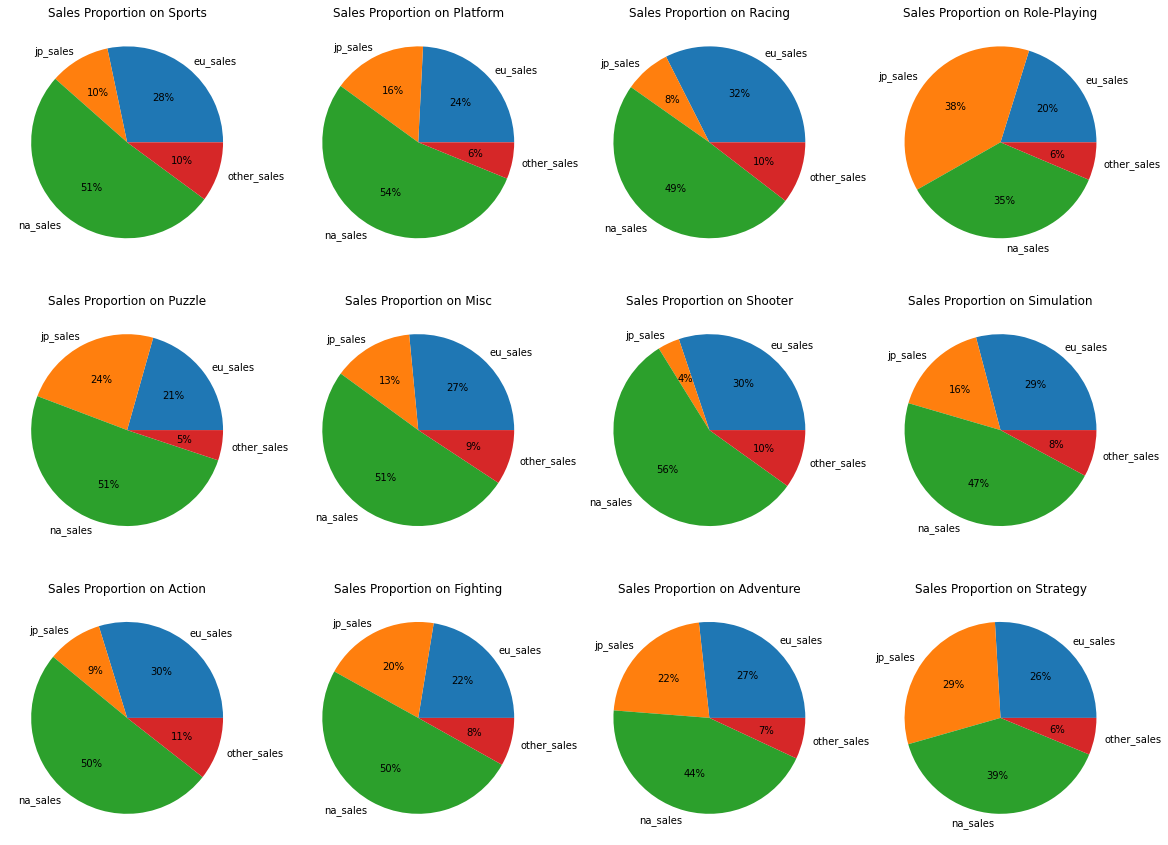

In [ ]:
name = 'Action'

i = 1
plt.figure(figsize=(20, 15))
# plotting data on chart
for genre in genres:
    plt.subplot(3, 4, i)
    plt.title(f'Sales Proportion on {genre}')
    plt.pie(genre_sales[genre], labels=genre_sales['index'], autopct='%.0f%%')
    i = i + 1

# displaying chart
plt.show()

The 5 most popular genres in NA are as follows:
- Actions at 879.01
- Sports at 684.43
- Shooters at 592.24
- Platforms at 445.50
- Misc at 407.27

The 5 most popular genres in the EU are as follows:
- Sports at 376.79
- Shooters at 317.34
- Racing at 236.51
- Misc at 212.74
- Platforms at 200.35

The 5 most popular genres on JP are as follows:
- Role-Playing at 355.41
- Sports at 135.54
- Platforms at 130.83
- Misc at 108.11
- Fighting at 87.48

Each region has different favorite genres on each platform. According to the data above, the most popular genre for the NA region is Action at 879.01 points, for the EU region is Sports at 376.79 points, and for the JP region is Role-Playing at 355.41 points

In [ ]:
esrb_data = data [['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'rating', 'total_sales']]
esrb_data.tail()

,name,na_sales,eu_sales,jp_sales,other_sales,rating,total_sales
16710,Samurai Warriors: Sanada Maru,0.00,0.00,0.01,0.0,RP,0.01
16711,LMA Manager 2007,0.00,0.01,0.00,0.0,RP,0.01
16712,Haitaka no Psychedelica,0.00,0.00,0.01,0.0,RP,0.01
16713,Spirits & Spells,0.01,0.00,0.00,0.0,RP,0.01
16714,Winning Post 8 2016,0.00,0.00,0.01,0.0,RP,0.01


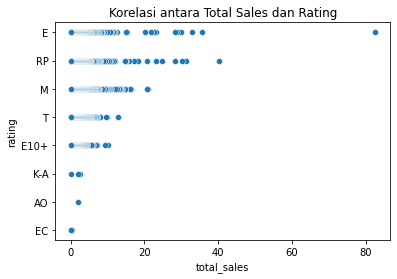

In [ ]:
plt.title('Correlation between Total Sales and Rating')
sns.scatterplot(data=esrb_data, x='total_sales', y='rating')
plt.show()

The ESRB rating itself has a weak correlation with sales in the three regions. Users don't really consider the ESRB rating when buying games, so this won't affect sales. so you don't need to worry about it.

# Step 5. Test the following hypotheses:

- The average user rating for Xbox One and PC platforms is the same.
- The average user rating for the Action and Sports genres is different.

Set the alpha threshold value by yourself.

Explain:
- How do you formulate the null hypothesis and the alternative hypothesis
- What level of significance did you choose to test the hypothesis, and explain why you chose that number

In [ ]:
# p-value
def verdict(p_value, alpha=0.05):
    print(f'P-Value: {round(p_value * 100, 2)}%')
    if p_value < alpha:
        print('H1 Accepted / H0 Rejected')
    else:
        print('H0 Accepted / H1 Rejected')

# 1. Categoric vs Categoric

- Method: Independent T-test
- Question: Is there any correlation between the average rating of Xbox One and PC platform users?
- Hypothesis:
     - H0: The average user rating for the Xbox One and PC platforms is the same.
     - H1: The average user rating for Xbox One and PC platforms is different.
- Alpha: 5%

In [ ]:
#Average user ratings on the Xbox One platform
user_xone = data.loc[(data.platform == 'XOne') & ~(data.rating.isna()), 'rating']
user_xone['rating'] = data.loc[(data.platform == 'XOne') & ~(data.rating.isna()), 'rating']
#Average user rating on PC platform
user_pc = data.loc[(data.platform == 'PC') & ~(data.rating.isna()), 'rating']
user_pc['rating'] = data.loc[(data.platform == 'PC') & ~(data.rating.isna()), 'rating']

In [ ]:
print(user_xone.groupby('rating').count().mean())
print(user_pc.groupby('rating').count().mean())

49.4
139.14285714285714


In [ ]:
#Variance on Xbox One and PC
print(user_xone.groupby('rating').count().var())
print(user_pc.groupby('rating').count().var())

251.3
14042.809523809525


In [ ]:
# p-value hypothesis
p_value1 = ttest_ind(user_xone.groupby('rating').count(), user_pc.groupby('rating').count(), equal_var=True).pvalue
verdict(p_value1)

P-Value: 12.79%
H0 Accepted / H1 Rejected


**Conclusion**

The average user rating for the Xbox One and PC platforms is the same.

# 2. Categoric vs Categoric

- Method: Independent T-test
- Question: Is there any correlation between the Action and Sports genres?
- Hypothesis:
     - H0: The average user rating for the Action and Sports genres is different.
     - H1: The average user rating for the Action and Sports genres is the same.
- Alpha: 5%

In [ ]:
#Average user rating in the Action genre
user_action = data.loc[(data.genre == 'Action') & ~(data.rating.isna()), 'rating']
user_action['rating'] = data.loc[(data.genre == 'Action') & ~(data.rating.isna()), 'rating']
#Average user rating in Sports genre
user_sports = data.loc[(data.genre == 'Sports') & ~(data.rating.isna()), 'rating']
user_sports['rating'] = data.loc[(data.genre == 'Sports') & ~(data.rating.isna()), 'rating']

In [ ]:
print(user_action.groupby('rating').count().mean())
print(user_sports.groupby('rating').count().mean())

481.2857142857143
469.6


In [ ]:
#Variance on Action and Sports
print(user_action.groupby('rating').count().var())
print(user_sports.groupby('rating').count().var())

168525.57142857145
265888.3


In [ ]:
# p-value hypothesis
p_value2 = ttest_ind(user_action.groupby('rating').count(), user_sports.groupby('rating').count(), equal_var=True).pvalue
verdict(p_value2)

P-Value: 96.59%
H0 Accepted / H1 Rejected


**Conclusion**

The average user rating for the Action and Sports genres is different.

# Step 6. Final Conclusions

Based on the data we used, we have a set of dataset `/datasets/games.csv`. In this dataset there are data related to video game sales around the world. Then, we do the analysis by making appropriate questions to describe consumer behavior. After we do the analysis, we do a hypothesis test to draw conclusions on what we have analyzed. In this case, we find that the average user rating for the Xbox One and PC platforms is the same, but the average user rating for the Action and Sports genres is different. Therefore, it can be concluded that the games on the Xbox One and PC platforms have many similarities or some of them can be accessed on different platforms (cross platforms), so users can play the same games on these two platforms.